In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from random import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
%matplotlib inline

## Load our data

In [2]:
newDF = pd.read_csv('heart.csv')
newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


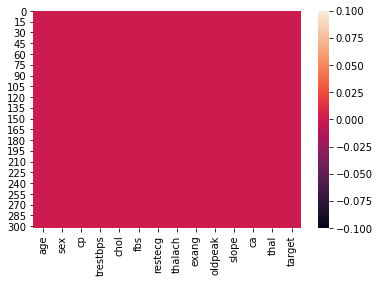

In [3]:
sns.heatmap(newDF.isnull())

# Taking a quick look at our data set

In [4]:
newDF.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
newDF.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### cp - chest pain type
### trestbps - resting blood pressure (in mm Hg on admission to the hospital)
### chol - serum cholestoral in mg/dl
### fbs - (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
### restecg - resting electrocardiographic results
### thalach - maximum heart rate achieved
### exang - exercise induced angina (1 = yes; 0 = no)


In [6]:
dataframe = newDF.sample(frac=1, random_state=42)
dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


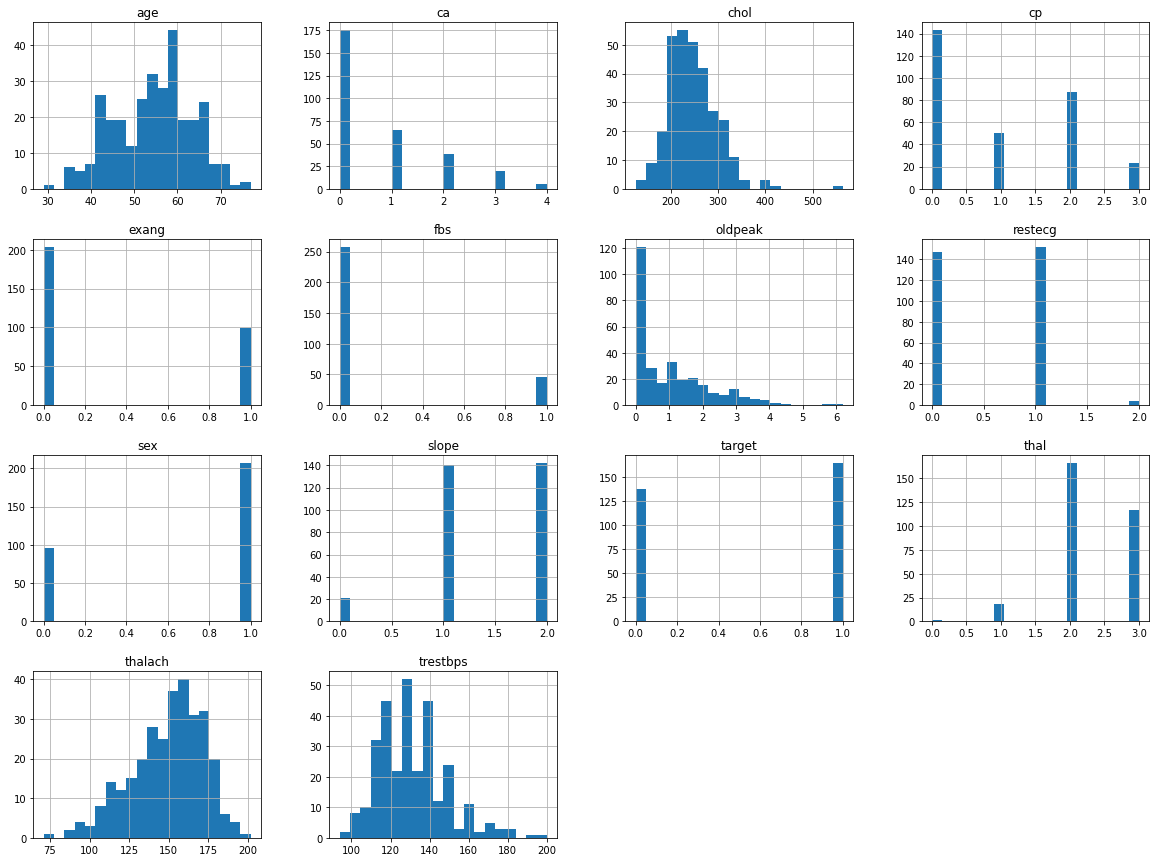

In [7]:
newDF.hist(bins = 20, figsize = (20,15))
plt.show()

## Train Test Split

In [8]:
train_set, test_set = train_test_split(newDF, test_size = 0.2,random_state=42)
print(train_set['target'].value_counts())
train_set

1    133
0    109
Name: target, dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


### We are going to leave the test set aside

## Our data is filled, we need to scale it and drop unnecessary columns

In [9]:
def clean_data(data):
    cp_dummies = pd.get_dummies(data['cp'], prefix='cp')
    thal_dummies = pd.get_dummies(data['thal'], prefix='thal')
    ecg_dummies = pd.get_dummies(data['restecg'], prefix='ecg')
    slope_dummies = pd.get_dummies(data['slope'], prefix='slope')
    ca_dummies = pd.get_dummies(data['ca'], prefix='ca')
    data=pd.concat([data,cp_dummies,thal_dummies,ecg_dummies,slope_dummies,ca_dummies],axis=1)
    
    data['log_chol'] = np.log(data['chol'])
    data['log_age'] = np.log(data['age'])
    data['log_thalach'] = np.log(data['thalach'])
    data['log_trestbps'] = np.log(data['trestbps'])    
    drop_cols = ['thalach', 'thal', 'trestbps', 'chol', 'cp', 'restecg', "slope", "age"]
    data = data.drop(drop_cols, axis=1)
    return data 

final_train_set=clean_data(train_set).drop('ecg_2' , axis=1)
final_train_set

,sex,fbs,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,log_chol,log_age,log_thalach,log_trestbps
132,1,0,0,0.0,0,1,0,1,0,0,...,1,1,0,0,0,0,5.686975,3.737670,5.087596,4.787492
202,1,0,1,0.8,0,0,1,0,0,0,...,1,1,0,0,0,0,5.598422,4.060443,4.709530,5.010635
196,1,0,0,3.6,0,0,0,0,1,0,...,0,1,0,0,0,0,5.442418,3.828641,4.990433,5.010635
75,0,0,0,1.4,0,1,0,1,0,0,...,0,1,0,0,0,0,5.521461,4.007333,5.081404,4.905275
176,1,1,1,1.4,2,0,1,0,0,0,...,1,0,0,1,0,0,5.438079,4.094345,5.075174,4.762174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,1,0,0,0.6,1,0,0,0,1,0,...,0,0,1,0,0,0,5.451038,3.912023,5.093750,4.941642
71,1,0,1,0.0,1,1,0,0,1,0,...,1,0,1,0,0,0,5.424950,3.931826,5.036953,4.543295
106,1,1,0,0.1,1,1,0,0,0,1,...,0,0,1,0,0,0,5.455321,4.234107,4.875197,5.075174
270,1,0,0,0.8,0,0,1,0,0,0,...,1,1,0,0,0,0,5.517453,3.828641,4.969813,4.787492


In [10]:
train_corr = final_train_set.corr()

## Checking for correlations in our dataset

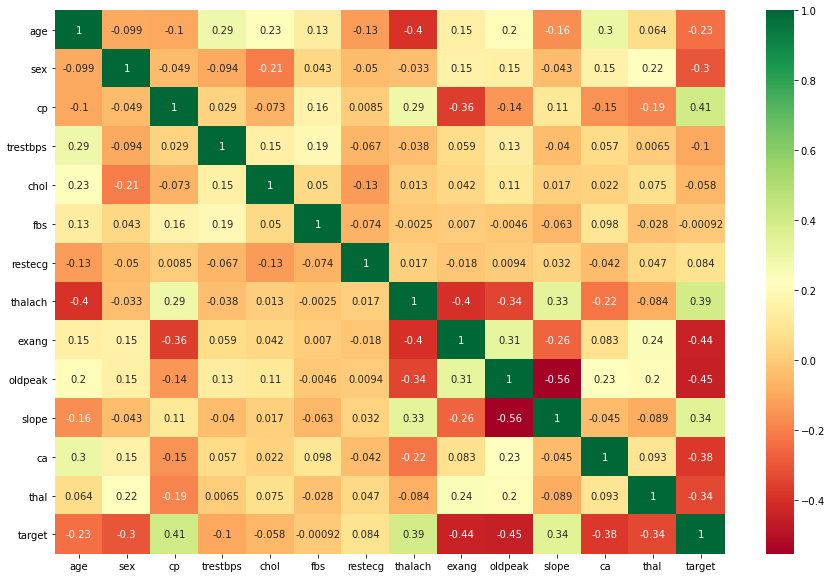

In [11]:
correlations = train_set.corr()
plt.figure (figsize= (15,10))

heatmap_diabetes = sns.heatmap(train_set.corr(), annot=True, cmap='RdYlGn')

plt.show()

# Splitting our train set into x-y

In [12]:
x_train = final_train_set.drop(['target'], axis = 1)
y_train = final_train_set['target'].copy()

# Choosing models and comparing between them

In [13]:
knn = KNeighborsClassifier()
dTree = DecisionTreeClassifier()
randomForest = RandomForestClassifier()
LogReg = LogisticRegression(max_iter = 3000)

In [14]:
knn.fit(x_train,y_train)
dTree.fit(x_train,y_train)
randomForest.fit(x_train,y_train)
LogReg.fit(x_train,y_train)

LogisticRegression(max_iter=3000)

In [15]:
knn_predict = cross_val_predict(knn, x_train, y_train, cv = 3)
dTree_predict = cross_val_predict(dTree, x_train, y_train, cv = 3)
randomForest_predict = cross_val_predict(randomForest, x_train, y_train, cv = 3)
LogReg_predict = cross_val_predict(LogReg, x_train, y_train, cv = 3)

## Inspecting the real values

In [16]:
print(np.array(y_train))

[1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1
 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0
 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0
 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0
 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1]


## Looking and the confusion matrix of each model

In [17]:
knn_confusion_mat = confusion_matrix(y_train , knn_predict)
dTree_confusion_mat = confusion_matrix(y_train , dTree_predict)
randomForest_confusion_mat = confusion_matrix(y_train , randomForest_predict)
LogReg_confusion_mat = confusion_matrix(y_train , LogReg_predict)

In [18]:
knn_confusion_mat

array([[ 89,  20],
       [ 25, 108]], dtype=int64)

In [19]:
dTree_confusion_mat

array([[75, 34],
       [40, 93]], dtype=int64)

In [20]:
randomForest_confusion_mat

array([[ 85,  24],
       [ 21, 112]], dtype=int64)

In [21]:
LogReg_confusion_mat

array([[ 86,  23],
       [ 19, 114]], dtype=int64)

# Evaluating each model's accuracy

In [22]:
knn_prec = precision_score(y_train , knn_predict)
print(knn_prec)

knn_recall = recall_score(y_train , knn_predict)
print(knn_recall)

knn_f1 = f1_score(y_train , knn_predict)
print(knn_f1)

knn_acc = accuracy_score(y_train , knn_predict)
print(knn_acc)

0.84375
0.8120300751879699
0.8275862068965517
0.8140495867768595


In [23]:
dTree_prec = precision_score(y_train , dTree_predict)
print(dTree_prec)

dTree_recall = recall_score(y_train , dTree_predict)
print(dTree_recall)

dTree_f1 = f1_score(y_train , dTree_predict)
print(dTree_f1)

dTree_acc = accuracy_score(y_train , dTree_predict)
print(dTree_acc)

0.7322834645669292
0.6992481203007519
0.7153846153846154
0.6942148760330579


In [24]:
randomForest_prec = precision_score(y_train , randomForest_predict)
print(dTree_prec)

randomForest_recall = recall_score(y_train , randomForest_predict)
print(dTree_recall)

randomForest_f1 = f1_score(y_train , randomForest_predict)
print(dTree_f1)

randomForest_acc = accuracy_score(y_train , randomForest_predict)
print(dTree_acc)

0.7322834645669292
0.6992481203007519
0.7153846153846154
0.6942148760330579


In [25]:
LogReg_prec = precision_score(y_train , LogReg_predict)
print(LogReg_prec)

LogReg_recall = recall_score(y_train , LogReg_predict)
print(LogReg_recall)

LogReg_f1 = f1_score(y_train , LogReg_predict)
print(LogReg_f1)

LogReg_acc = accuracy_score(y_train , LogReg_predict)
print(LogReg_acc)

0.8321167883211679
0.8571428571428571
0.8444444444444443
0.8264462809917356


## The Logistic Regression model seems to be performing the best, let's check its ROC and AUC score:

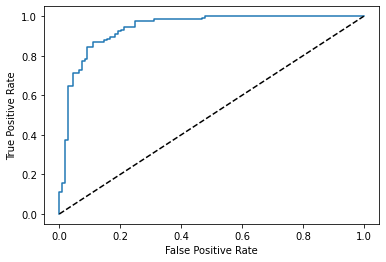

In [26]:
y_score = LogReg.predict_proba(x_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, y_score)
plt.plot(fpr,tpr,[0, 1], [0, 1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [27]:
roc_auc_score(y_train,LogReg_predict)

0.8230668414154653

## Checking the model on our test set, but first lets update the changes to the test set too:

In [28]:
final_test_set=clean_data(test_set)

In [29]:
x_test = final_test_set.drop('target',axis=1)
y_test = final_test_set["target"].copy()
final_predictions = LogReg.predict(x_test)
final_f1=f1_score(y_test,final_predictions)
print(final_f1*100,'%')

89.23076923076923 %
